In [1]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms 
import pandas as pd
import PIL
import numpy as np 
import matplotlib.pyplot as plt
from easyimages import EasyImageList
from torch import nn
import torch
from sklearn.metrics import accuracy_score, classification_report, log_loss
import torch.nn.functional as F
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
import ignite

/home/i008/anaconda3/lib/python3.6/site-packages/easyimages/utils.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/i008/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/i008/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/i008/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/i008/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/i008/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop

### Define the new dataset

Keep in mind we are inheriting the Dataset base-class. And we have to override 2 methods:
 - \____len____
 - \____getitem____

1. load_image_and_target reads the data from the csv file and converts the image array into a PIL object - this is not mandatory but useful, as many handy functions like transform, operate on PIL.Images
2. getitem, takes a index and it should properly return for every number between (0, and len)
3. len should return the number of samples (images) in your dataset

In [2]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

class FashionMnist(Dataset):

    def __len__(self):
        return len(self.metadata_df)

    def __init__(self, metadata_df,
                 transform=None):
        
        self.metadata_df = metadata_df.copy()
        self.transform = transform
    
    def load_image_and_target(self,index):
        # .iloc is short for integer loc it returns a row of data based on its ored not index-value(if not the same)
        oneimage = self.metadata_df.iloc[index]
        image, y = PIL.Image.fromarray(
            np.array(oneimage[1:]).reshape(28, 28).astype('uint8'), 'L'), oneimage[0]
        
        return image, y
    
    def _load_image_metadata(self, index):
        
        image_path = df.iloc[index]
        
        image = PIL.Image.open(image_path)
        meta_data = image.meta_data
        
        image, metada 
        
    def __getitem__(self, index):
        X, y = self.load_image_and_target(index)
        # We can transform the output images here, cast to torch data-format and/or do augmentations
        X = self.transform(X)
            
        return X, y

    def collate_func(self, batch):
        pass

    
dftrain = pd.read_csv('data/fashion-mnist_train.csv').sample(frac=1)
dftest = pd.read_csv('data/fashion-mnist_test.csv').sample(frac=1)

transform_train = transforms.Compose([transforms.ToTensor()])
fmnist_train = FashionMnist(dftrain, transform=transform_train)

transform_test = transforms.Compose([transforms.ToTensor()])
fmnist_test = FashionMnist(dftest, transform=transform_test)

In [3]:
X, y = fmnist_test[0]
X.shape

torch.Size([1, 28, 28])

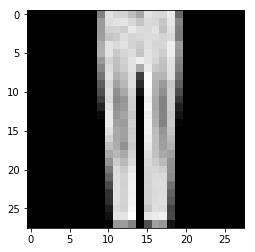

In [4]:
one_sample_image = dftrain.iloc[20].tolist()
label, image =  one_sample_image[0], one_sample_image[1:]
label
im = np.array(image).reshape((28, 28))

plt.imshow(im, cmap='gray')


### our datasets supports getitem wich means we can do:

In [5]:
image, label = fmnist_train[0]
print(type(image))
print(type(label), label)

image, label = fmnist_train.load_image_and_target(0)
print(type(image), image)

<class 'torch.Tensor'>
<class 'numpy.int64'> 8
<class 'PIL.Image.Image'> <PIL.Image.Image image mode=L size=28x28 at 0x7F8E286C85C0>


In [6]:
fmnist_dl = DataLoader(fmnist_train, batch_size=32, num_workers=10)
batch_iterator = iter(fmnist_dl)
X, y = next(batch_iterator)

for batch in fmnist_dl:
    break
for batch in fmnist_dl:
    break
    
print("y:",batch[1].shape)
print("X: ", batch[0].shape)


y: torch.Size([32])
X:  torch.Size([32, 1, 28, 28])


### Explore your dataset
Its always good to start with getting some inside about your dataset. Thats usuall much easier and less important in image datasets - but it does not mean you should not do it.

Things you should always think about working with an image dataset are:
- Check target distribiution (counts) do you see a strong imbalance?
- Check sizes of images, if not all images are of the same size you might destroy your data with wrong transformations
 

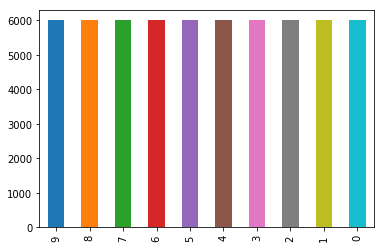

In [10]:
dftrain.label.value_counts().plot(kind='bar')

### visualize a batch
Its always a good idea to sanity check the output of our loaders

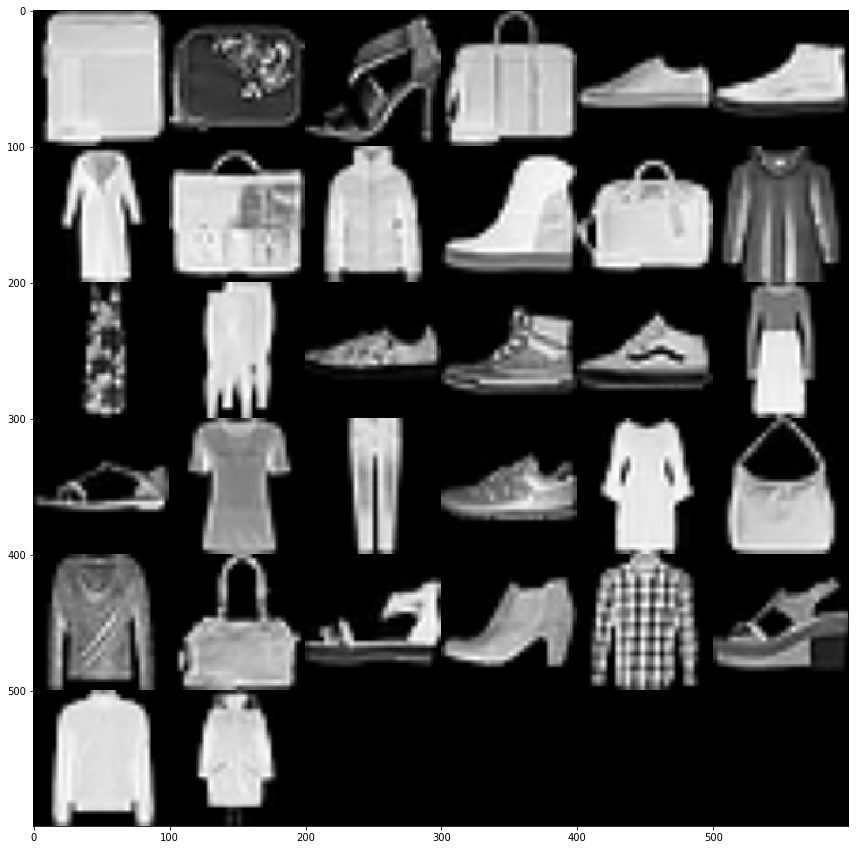

In [7]:
im = EasyImageList.from_torch_batch(X.repeat(1,3,1,1), # we need to add 3 channels to the images
                                    mean=None, std=None)
im.numpy_grid()

### Define your model architecture
As a baseline model dont  overcomplicate, either use some very simple architecture or go with something well established like resnet. There will be time to go more fancy

Here we define a model with two CONV blocks comprising of a typical:  
*Conv>BN>RELU>POOL* setting

In [8]:
class SimpleCNN(nn.Module):
    def __init__(self, num_of_class):
        super(SimpleCNN, self).__init__()
    
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = nn.Linear(7 * 7 * 32, num_of_class)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc(out)
        return out
    
    


In [9]:
# Always check your model are you atleasy able to make a forward pass and shapes match your expectations?
image = torch.randn(32, 1, 28, 28)
cnn = SimpleCNN(10)
output = cnn(image)
print("input shape:")
print(image.shape)
print("output shape:")
print(output.shape)

input shape:
torch.Size([32, 1, 28, 28])
output shape:
torch.Size([32, 10])


### Define your loss function / crieterion and optimizer
Its a good idea to create some dummy data and pass it trough the cost function to make sure you uderstand what the shapes shoudl be

In case of CrossEntropyLosss We want our predictions to be of shape (BATCH_SIZE, N_CLASSES) and y_true of shape (BS) 
(Basically a vector of number that corespond to the class) 


In [42]:
LR= 0.001
BATCH_SIZE = 16
DATASET_USAGE_SIZE = 0.1

MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]
RESIZE = 28

cnn = SimpleCNN(10)

OPTIMIZER = 'Adam' # one of ['ASGD','Adadelta', 'Adagrad','Adam', 'Adamax','LBFGS', 'RMSprop','Rprop','SGD',SparseAdam']
optimizer = getattr(torch.optim, OPTIMIZER)(cnn.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

cnn.to(DEVICE)

# Create dataset loaders

dftrain = pd.read_csv('data/fashion-mnist_train.csv').sample(frac=DATASET_USAGE_SIZE)
dftest = pd.read_csv('data/fashion-mnist_test.csv').sample(frac=0.1)

transform_train = transforms.Compose([transforms.Resize(RESIZE), transforms.ToTensor()])
fmnist_train = FashionMnist(dftrain, transform=transform_train)

transform_test = transforms.Compose([transforms.Resize(RESIZE), transforms.ToTensor()])
fmnist_test = FashionMnist(dftest, transform=transform_test)

fmnist_train_dl = DataLoader(fmnist_train, batch_size=BATCH_SIZE)
fmnist_test_dl = DataLoader(fmnist_test, batch_size=BATCH_SIZE)

# Lets try to use the criterion with dummy data
yp = torch.randn(BATCH_SIZE, 10)
yt = torch.randint(10, (BATCH_SIZE,))
criterion(yp, yt.long())

len(fmnist_train_dl)
len(dftrain)

6000

In [43]:
from ignite.engine import create_supervised_evaluator, create_supervised_trainer
from ignite.metrics import CategoricalAccuracy, Loss
from ignite.engine import Events
from ignite.handlers import EarlyStopping

In [44]:
trainer = create_supervised_trainer(cnn, 
                                    optimizer,
                                    criterion, 
                                    DEVICE)

evaluator = create_supervised_evaluator(cnn, 
                                        metrics={'accuracy':CategoricalAccuracy(), 
                                                 'loss':Loss(criterion)}, 
                                        device=DEVICE)

In [45]:
@trainer.on(Events.EPOCH_COMPLETED)
def validate(trainer):
    evaluator.run(fmnist_test_dl)
    metrics = evaluator.state.metrics
    print('loss: ', metrics['loss'], 'acc: ', metrics['accuracy'])
#     print('acc: ', metrics['accuracy'])

In [46]:
trainer.run(fmnist_train_dl, max_epochs=10)

loss:  0.4387104421854019 acc:  0.842
loss:  0.40865893924236296 acc:  0.85
loss:  0.3986963118314743 acc:  0.853
loss:  0.3966773232221603 acc:  0.865
loss:  0.40952960658073423 acc:  0.865
loss:  0.4167797150611877 acc:  0.868
loss:  0.43285132706165313 acc:  0.865
loss:  0.44732231622934343 acc:  0.865
loss:  0.45951636898517606 acc:  0.867
loss:  0.4650591692328453 acc:  0.875
